<h2 align='center' style='color:purple'>Finding best model and hyper parameter tunning using GridSearchCV</h2>

<div style='text-align:justify'>In this tutorial we learn how to choose the best model for machine learning problem and how to do a hyperperameter tuning.</div>

**For iris flower dataset in sklearn library, we are going to find out best model and best hyper parameters using GridSearchCV**

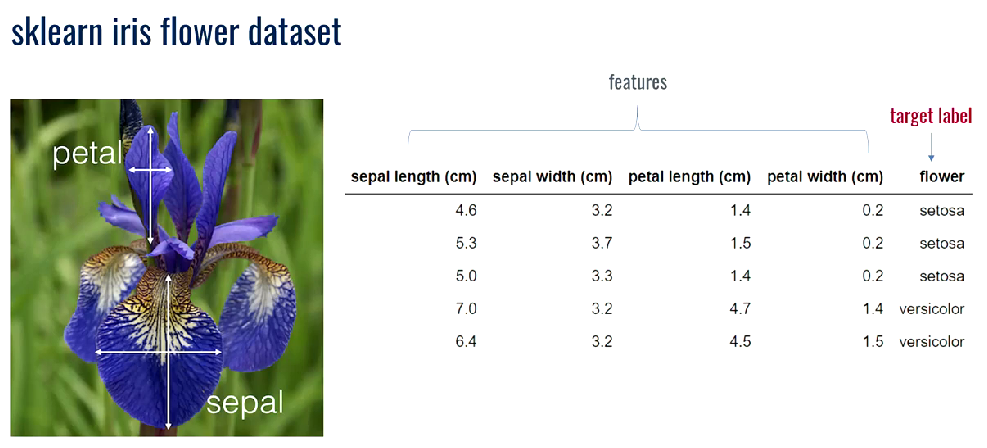

## Which Model Should I choose?
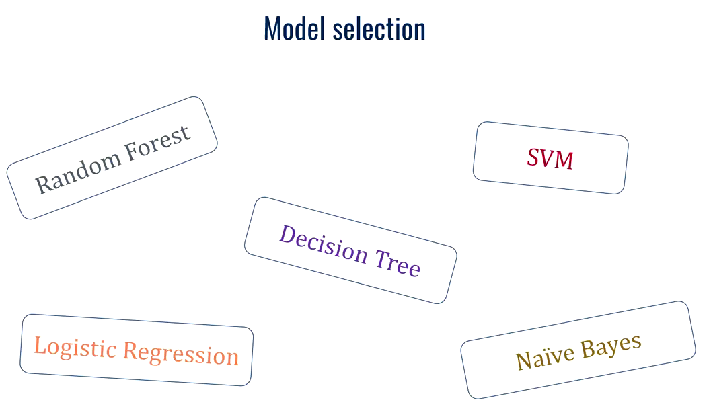

**After choosing the model now you have hyperparameters to choose?!? (e.g. SVM: Kernel, C, Gamma)**
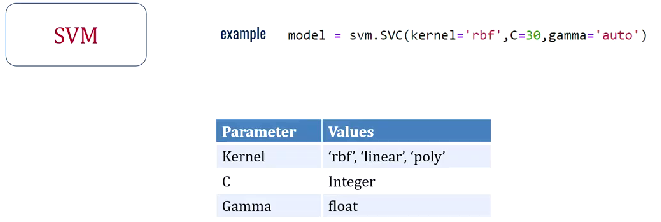

**The process of choosing the optimal parameter is called <font color='red'>Hyperparameter Tunning</font>.**

**Load iris flower dataset**

In [1]:
from sklearn import svm, datasets
iris = datasets.load_iris()

In [2]:
import pandas as pd
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['flower'] = iris.target
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])
df[47:150]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<h3 style='color:blue'>Approach 1: Use train_test_split and manually tune parameters by trial and error</h3>

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [4]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9777777777777777

**The problem with this method is that by doing it again the score is changing.**

<h3 style='color:blue'>Approach 2: Use K Fold Cross validation</h3>

<div style='text-align:justify'>In K Fold Cross Validation, we divide datasamples into n number of folds(here n=5). Then we take 5 iterations and in each iteration 1 Fold is test set and the other 4 is training test, we find a score in that iteration and make an average for scores.</div>   

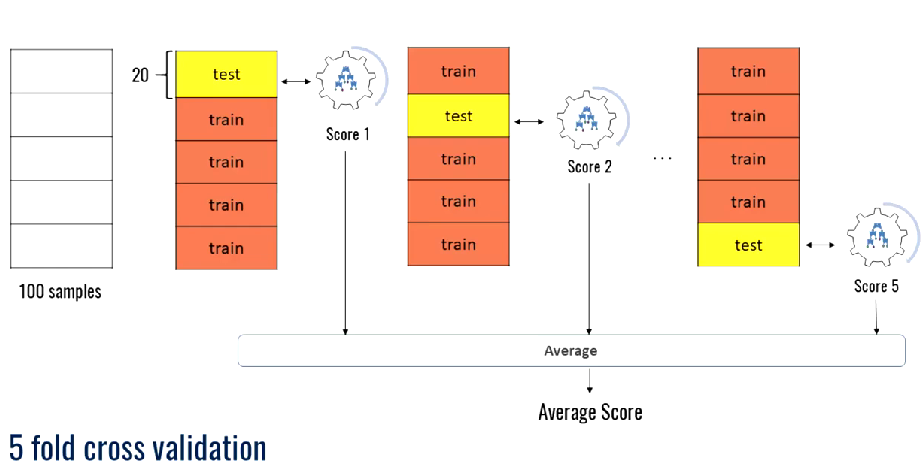

**Manually try suppling models with different parameters to cross_val_score function with 5 fold cross validation**

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [7]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [8]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

**Above approach is tiresome and very manual. We can use for loop as an alternative**

In [10]:
import numpy as np
kernels = ['rbf', 'linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data, iris.target, cv=5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

**From above results we can say that rbf with C=1 or 10 or linear with C=1 will give best performance. So this way I can find the optimal score.**

<h3 style='color:purple'>But this approcah has some issues, because if I have 4 parameters then I have to run 4 for loops then it will be too iterations and it is not convinient.</h3>

<h3 style='color:blue'>Approach 3: Use GridSearchCV</h3>

**GridSearchCV does exactly same thing as for loop above but in a single line of code**

In [11]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00100017, 0.00140014, 0.0012001 , 0.0006    , 0.00100017,
        0.00080004]),
 'std_fit_time': array([1.50789149e-07, 1.35650829e-03, 7.48353720e-04, 4.89901382e-04,
        1.50789149e-07, 4.00018706e-04]),
 'mean_score_time': array([0.        , 0.00039997, 0.00040002, 0.00040007, 0.00019999,
        0.00020003]),
 'std_score_time': array([0.        , 0.00048986, 0.00048992, 0.00048998, 0.00039997,
        0.00040007]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

**CV results are not easy to view, but sklearn provides a way to download these results into a dataframe.**  

In [12]:

df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0010,1.507891e-07,0.0000,0.00000,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.0014,1.356508e-03,0.0004,0.00049,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.0012,7.483537e-04,0.0004,0.00049,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.0006,4.899014e-04,0.0004,0.00049,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.0010,1.507891e-07,0.0002,0.00040,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.0008,4.000187e-04,0.0002,0.00040,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [13]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [14]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_

In [15]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [16]:
clf.best_score_

0.9800000000000001

<div style='text-align:jistify'>One issue that can happen with GraiSearchCV is the computation cost. Our dataset is very limited in this tutorial but imagine a big dataset for parameters you have so many values. Right now C values are 1,10,20; what if I want to try a range like 1 to 50, the cost will go really high.</div>

<div style='text-align:justify'><b>To tackle this priblem use <font color='blue'>RandomizedSearchCV</font> to reduce number of iterations and with random combination of parameters. It helps reduce the cost of computation.</b></div>

In [17]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(iris.data, iris.target)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,linear,0.973333
1,1,rbf,0.980000


<div style='text-align:justify'><b>This works well in practical life, because if you don't have too much comutation power and you want to try random values of parameters.</b></div>   

## Choose a best model: 

In [18]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [19]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [20]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 10}
2,logistic_regression,0.966667,{'C': 5}


<div style='text-align:justify'><b>Based on above, I can conclude that SVM with C=1 and kernel='rbf' is the best model for solving my problem of iris flower classification.</b></div>

|  Date |  Author |   |   |
|---|---|---|---|
| 2021-10-15    |   <font color=blue>**Ehsan Zia**</font>  |  |  |